In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn.neighbors import DistanceMetric
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering # for clustering
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from prettytable import PrettyTable
import warnings
warnings.filterwarnings("ignore")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!wget -O checkpoints_pulse.csv "https://www.dropbox.com/scl/fi/x9thuoruiphd7u9im3wgz/checkpoints_pulse.csv?rlkey=2sqdil8c0tcv4pre3e7hgxn2b&dl=0"

--2024-04-07 14:07:23--  https://www.dropbox.com/scl/fi/x9thuoruiphd7u9im3wgz/checkpoints_pulse.csv?rlkey=2sqdil8c0tcv4pre3e7hgxn2b&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc0fa67aaea91ba222cab07e62c.dl.dropboxusercontent.com/cd/0/inline/CQk6wYhwkT8GdcbO_2Zxf5WtVXq6Zb7ZIv8Vw6NW4EHxxFXVKS_Qf-8S0AqSpQ4dMHkAPPLdmXg9jdfzdVpgYWy_ddh1fqqsQ0fkr6nRr3eWyxFuVUPBI7KxpfNUUGTD0lTPyVX4T3uMteIYsgY_YkkC/file# [following]
--2024-04-07 14:07:23--  https://ucc0fa67aaea91ba222cab07e62c.dl.dropboxusercontent.com/cd/0/inline/CQk6wYhwkT8GdcbO_2Zxf5WtVXq6Zb7ZIv8Vw6NW4EHxxFXVKS_Qf-8S0AqSpQ4dMHkAPPLdmXg9jdfzdVpgYWy_ddh1fqqsQ0fkr6nRr3eWyxFuVUPBI7KxpfNUUGTD0lTPyVX4T3uMteIYsgY_YkkC/file
Resolving ucc0fa67aaea91ba222cab07e62c.dl.dropboxusercontent.com (ucc0fa67aaea91ba222cab07e62c.dl.dropboxusercontent.com)... 162.12

In [ ]:
!wget -O checkpoints_eoc.csv "https://www.dropbox.com/scl/fi/b1aku2alzzji5op4r3seg/checkpoints_eoc.csv?rlkey=v9c04byuqw17plubunblsl2kw&dl=0"

--2024-04-07 23:16:05--  https://www.dropbox.com/scl/fi/b1aku2alzzji5op4r3seg/checkpoints_eoc.csv?rlkey=v9c04byuqw17plubunblsl2kw&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc726d84e144ce7283ab759316ee.dl.dropboxusercontent.com/cd/0/inline/CQlD0afnN7-xmICrMAGfZnp-PjbhjZhRZbTKutjRDlRsZdy7mCM123tyhkF5XT22ZS7l1TqNyGwQ54d5FIZ1BfUwXMP9bL_EmucH-X6P7YdRt1yr-rKUTPzallpzE-1aW1QzWI9vnCfSH5nu2HQgMmaj/file# [following]
--2024-04-07 23:16:06--  https://uc726d84e144ce7283ab759316ee.dl.dropboxusercontent.com/cd/0/inline/CQlD0afnN7-xmICrMAGfZnp-PjbhjZhRZbTKutjRDlRsZdy7mCM123tyhkF5XT22ZS7l1TqNyGwQ54d5FIZ1BfUwXMP9bL_EmucH-X6P7YdRt1yr-rKUTPzallpzE-1aW1QzWI9vnCfSH5nu2HQgMmaj/file
Resolving uc726d84e144ce7283ab759316ee.dl.dropboxusercontent.com (uc726d84e144ce7283ab759316ee.dl.dropboxusercontent.com)... 162.125.

In [ ]:
!wget -O items.csv "https://www.dropbox.com/scl/fi/ax8qa1gpoo2tqpzxjl98g/items.csv?rlkey=h7lhoq89a9csmldp2qcl0fomi&dl=0"

In [ ]:
!wget -O media_views.csv "https://www.dropbox.com/scl/fi/o3pne25ntjwmy7itl7ie8/media_views.csv?rlkey=iu146l97sq7cjj82kxq6pi35z&dl=0"

In [ ]:
!wget -O page_views.csv "https://www.dropbox.com/scl/fi/y3pkpvkrct6qr62jh6p64/page_views.csv?rlkey=0sb33o5figx4foubzidn3zl60&dl=0"

In [ ]:
!wget -O responses.csv "https://www.dropbox.com/scl/fi/s80recznjwsgxkyf0hi10/responses.csv?rlkey=ywn84xqmn4kqo2j1pl9pep4wz&dl=0"

In [ ]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('checkpoints_pulse.csv')
df.head()

In [ ]:
# See null values
print(df.info())
# See the dataset
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76848 entries, 0 to 76847
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   book            76848 non-null  object 
 1   release         76848 non-null  object 
 2   institution_id  76848 non-null  object 
 3   class_id        76848 non-null  object 
 4   student_id      76848 non-null  object 
 5   chapter_number  76848 non-null  int64  
 6   construct       76848 non-null  object 
 7   response        44462 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 4.7+ MB
None
                                          book release  \
0  College / Statistics and Data Science (ABC)    v5.0   
1  College / Statistics and Data Science (ABC)    v5.0   
2  College / Statistics and Data Science (ABC)    v5.0   
3  College / Statistics and Data Science (ABC)    v5.0   
4  College / Statistics and Data Science (ABC)    v5.0   

                         i

In [ ]:
# See where the dataset have missing value
df[df.isnull().any(axis = 1)]

,book,release,institution_id,class_id,student_id,chapter_number,construct,response
0,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,10,Cost,NaN
1,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,11,Cost,NaN
2,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,12,Cost,NaN
5,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,4,Cost,NaN
8,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,7,Cost,NaN
...,...,...,...,...,...,...,...,...
76842,High School / Advanced Statistics and Data Sci...,v5.0,fc5f1b1b-2aeb-4e09-93fc-06fdac0d8030,95370fbf-5008-435f-b801-8214285f251b,eb698b03-c893-4700-90d1-e75faebf34a3,8,Utility Value,NaN
76844,High School / Advanced Statistics and Data Sci...,v5.0,fc5f1b1b-2aeb-4e09-93fc-06fdac0d8030,95370fbf-5008-435f-b801-8214285f251b,eb698b03-c893-4700-90d1-e75faebf34a3,13,Cost,NaN
76845,High School / Advanced Statistics and Data Sci...,v5.0,fc5f1b1b-2aeb-4e09-93fc-06fdac0d8030,95370fbf-5008-435f-b801-8214285f251b,eb698b03-c893-4700-90d1-e75faebf34a3,13,Utility Value,NaN
76846,High School / Advanced Statistics and Data Sci...,v5.0,fc5f1b1b-2aeb-4e09-93fc-06fdac0d8030,95370fbf-5008-435f-b801-8214285f251b,eb698b03-c893-4700-90d1-e75faebf34a3,13,Expectancy,NaN


In [ ]:
# Remove rows where the "response" column contains NaN values
df_cleaned = df.dropna(subset=['response'])

# Display the first few rows of the cleaned DataFrame
df_cleaned.head()

,book,release,institution_id,class_id,student_id,chapter_number,construct,response
3,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,2,Cost,4.0
4,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,3,Cost,4.0
6,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,5,Cost,3.0
7,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,6,Cost,3.0
9,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,8,Cost,2.0


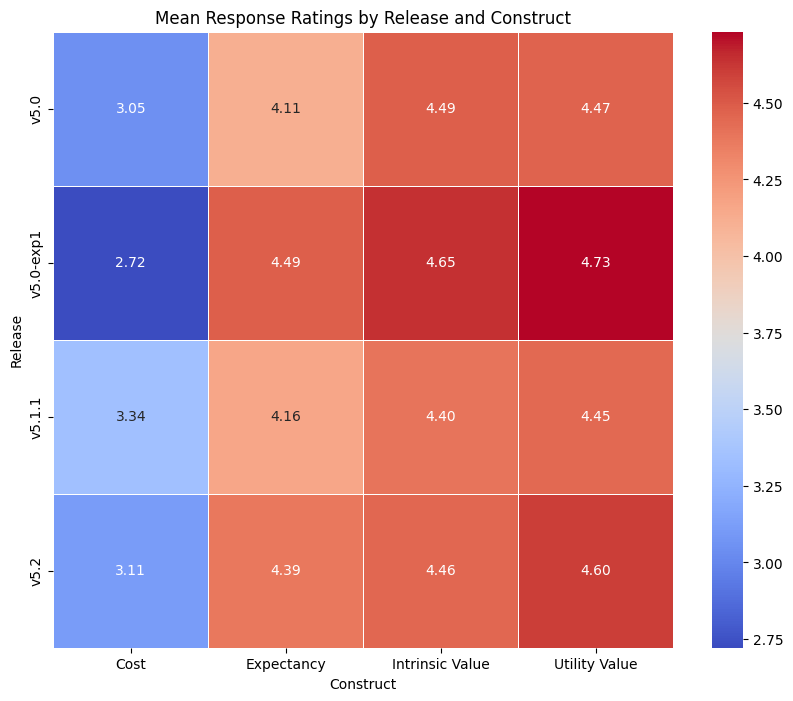

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming your DataFrame is named df
# Pivot the DataFrame to create a matrix where each row represents a "release" version,
# each column represents a construct, and the values are the mean response ratings
pivot_df = df.pivot_table(index='release', columns='construct', values='response', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mean Response Ratings by Release and Construct')
plt.xlabel('Construct')
plt.ylabel('Release')
plt.show()

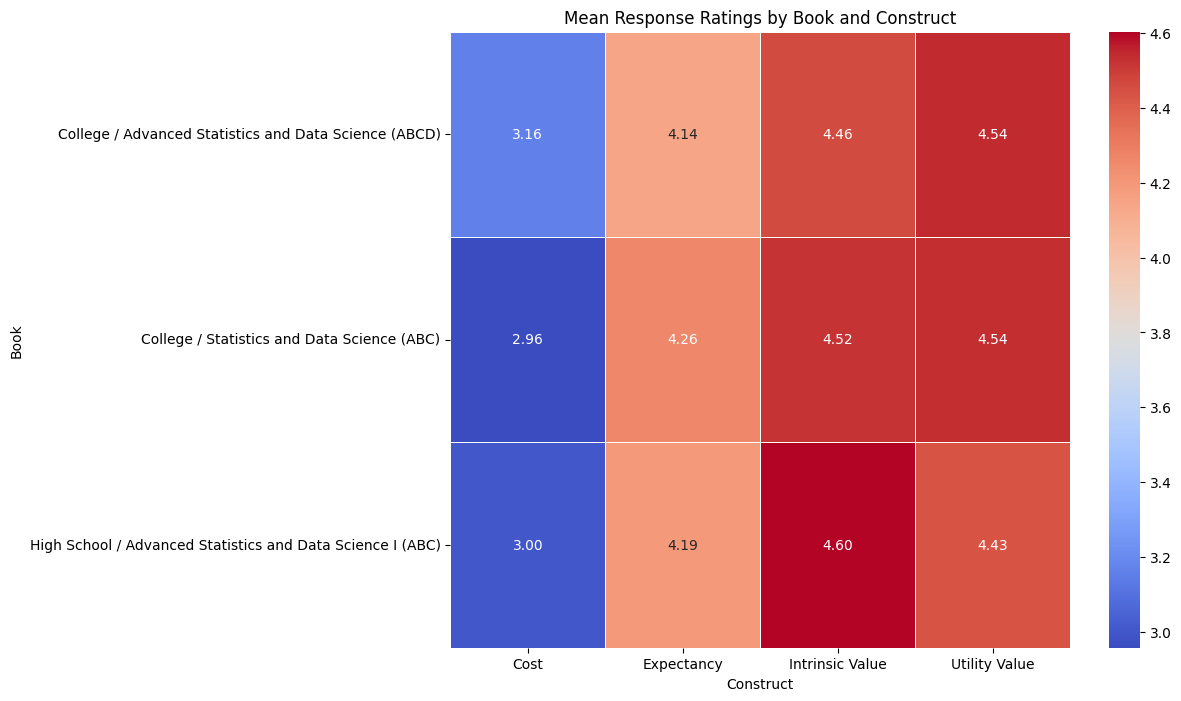

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming your DataFrame is named df
# Pivot the DataFrame to create a matrix where each row represents a "release" version,
# each column represents a construct, and the values are the mean response ratings
pivot_df = df.pivot_table(index='book', columns='construct', values='response', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mean Response Ratings by Book and Construct')
plt.xlabel('Construct')
plt.ylabel('Book')
plt.show()

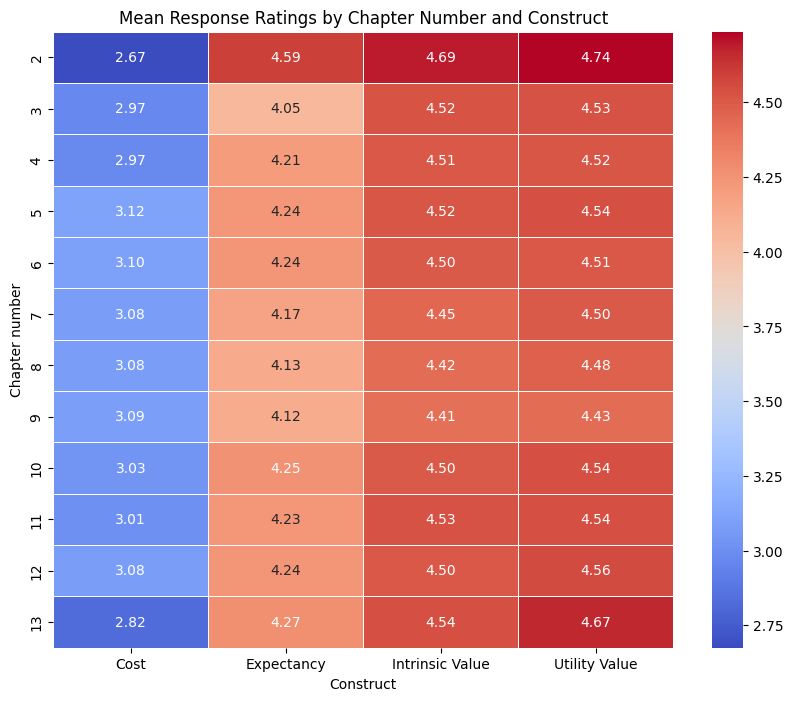

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming your DataFrame is named df
# Pivot the DataFrame to create a matrix where each row represents a "release" version,
# each column represents a construct, and the values are the mean response ratings
pivot_df = df.pivot_table(index='chapter_number', columns='construct', values='response', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mean Response Ratings by Chapter Number and Construct')
plt.xlabel('Construct')
plt.ylabel('Chapter number')
plt.show()

<ipython-input-20-e80dc615c324>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='construct', y='response', palette='coolwarm')


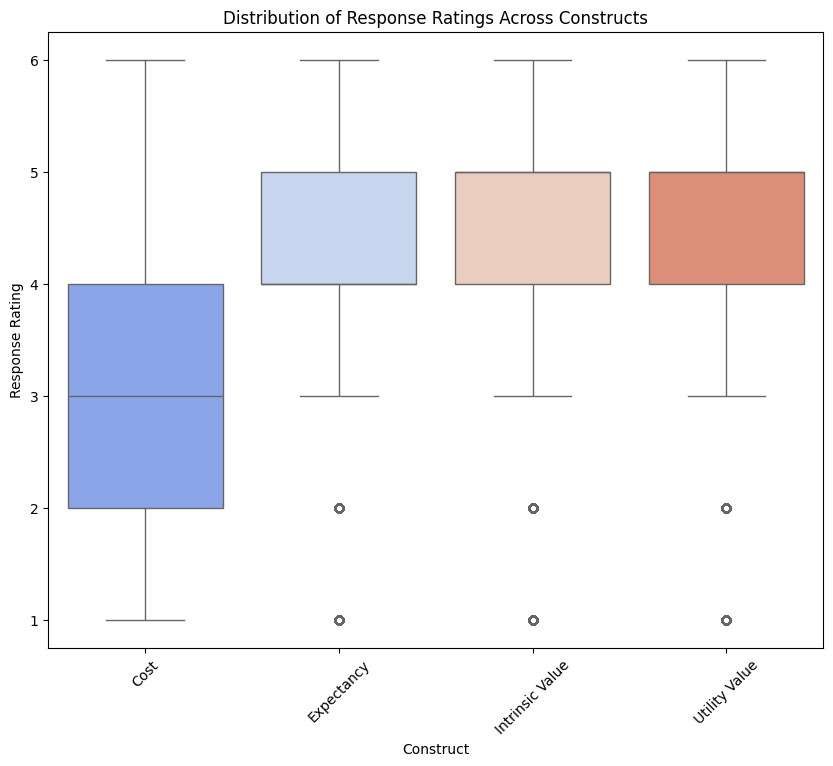

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='construct', y='response', palette='coolwarm')
plt.title('Distribution of Response Ratings Across Constructs')
plt.xlabel('Construct')
plt.ylabel('Response Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

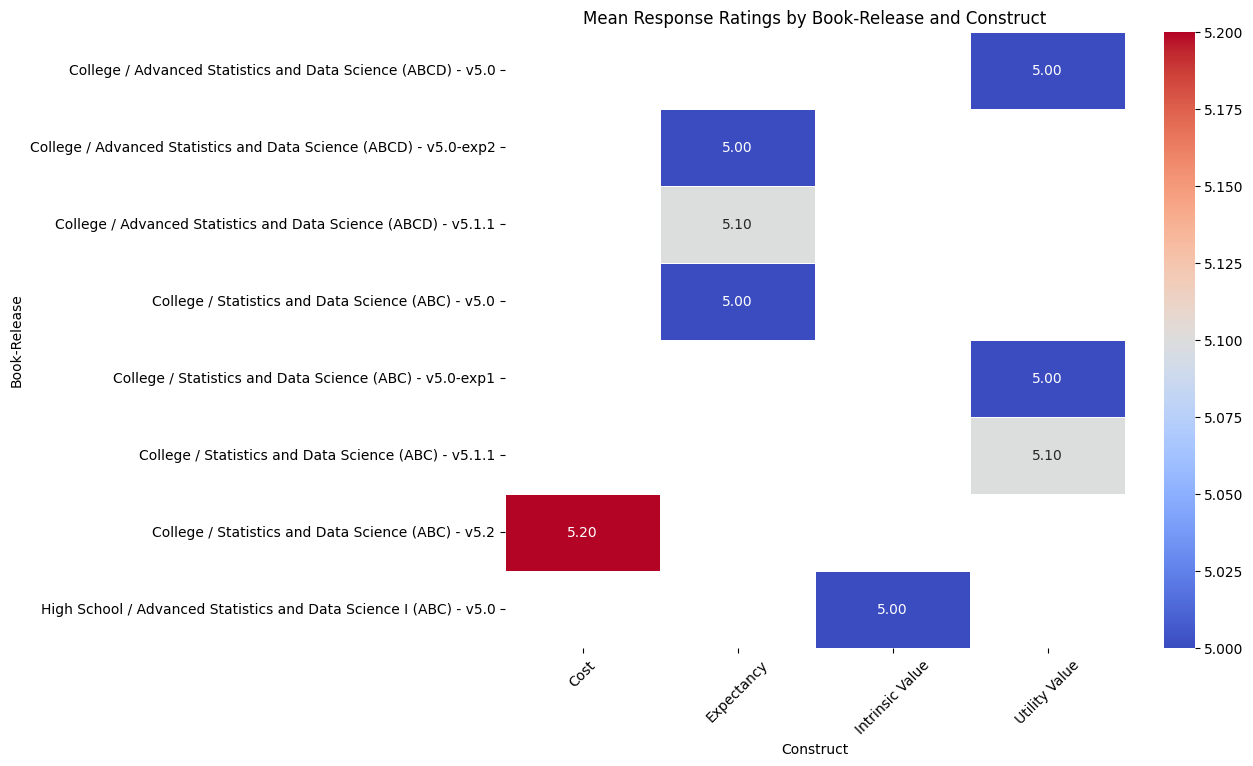

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    'book': ['College / Advanced Statistics and Data Science (ABCD)', 'College / Advanced Statistics and Data Science (ABCD)',
             'College / Advanced Statistics and Data Science (ABCD)', 'College / Statistics and Data Science (ABC)',
             'College / Statistics and Data Science (ABC)', 'College / Statistics and Data Science (ABC)',
             'College / Statistics and Data Science (ABC)', 'High School / Advanced Statistics and Data Science I (ABC)'],
    'release': ['v5.0-exp2', 'v5.0', 'v5.1.1', 'v5.0-exp1', 'v5.0', 'v5.1.1', 'v5.2', 'v5.0'],
    'construct': ['Expectancy', 'Utility Value', 'Expectancy', 'Utility Value', 'Expectancy', 'Utility Value', 'Cost', 'Intrinsic Value']
}

# Create DataFrame
df = pd.DataFrame(data)

# Merge "book" and "release" columns into a single column
df['book_release'] = df['book'] + ' - ' + df['release']

# Create a numeric representation of the release versions
df['numeric_release'] = df['release'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

# Pivot the DataFrame to create a matrix
pivot_df = df.pivot_table(index='book_release', columns='construct', values='numeric_release', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mean Response Ratings by Book-Release and Construct')
plt.xlabel('Construct')
plt.ylabel('Book-Release')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the DataFrame to create a matrix
pivot_df = df_cleaned.pivot_table(index='book_release', columns='construct', values='response', aggfunc='mean')

# Determine vmin and vmax based on the entire range of response values
vmin = df_cleaned['response'].min()
vmax = df_cleaned['response'].max()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=vmin, vmax=vmax)  # Set vmin and vmax
plt.title('Mean Response Ratings by Book-Release and Construct')
plt.xlabel('Construct')
plt.ylabel('Book-Release')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


KeyError: 'response'

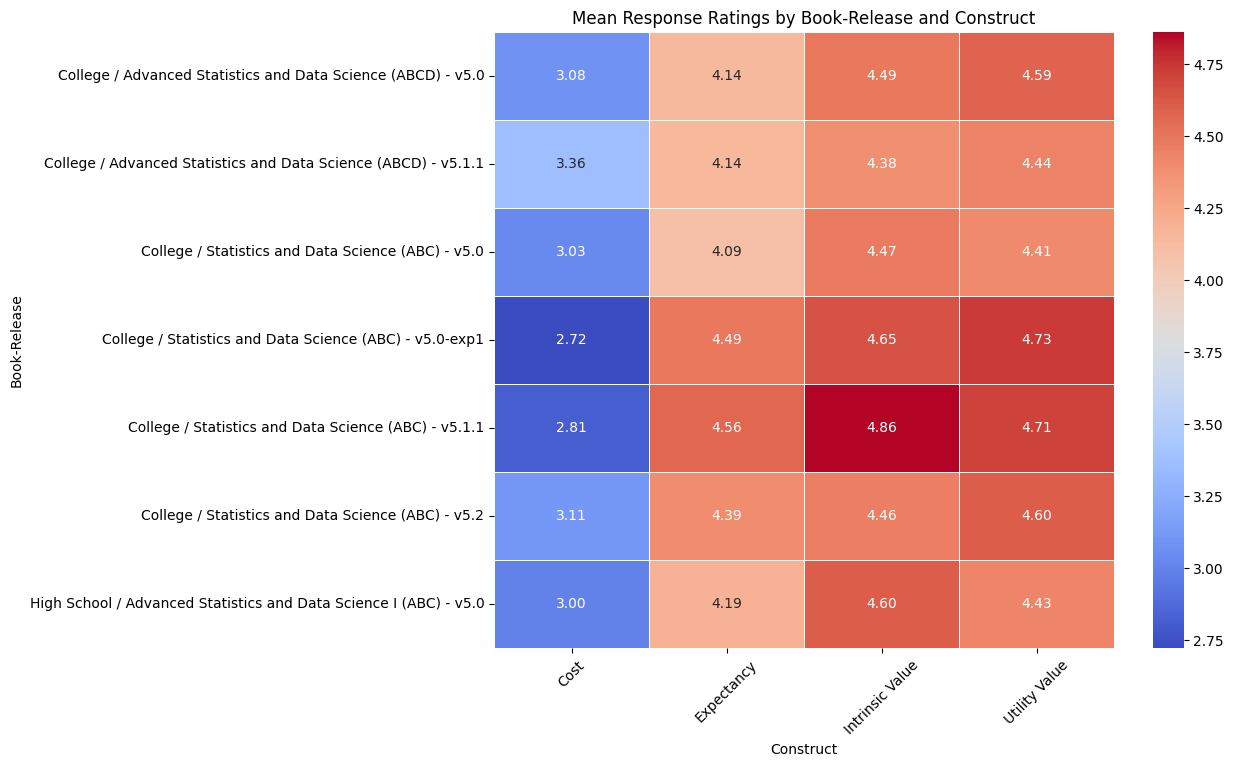

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('checkpoints_pulse.csv')

# Merge "book" and "release" columns into a single column
df['book_release'] = df['book'] + ' - ' + df['release']

# Pivot the DataFrame to create a matrix
pivot_df = df.pivot_table(index='book_release', columns='construct', values='response', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mean Response Ratings by Book-Release and Construct')
plt.xlabel('Construct')
plt.ylabel('Book-Release')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


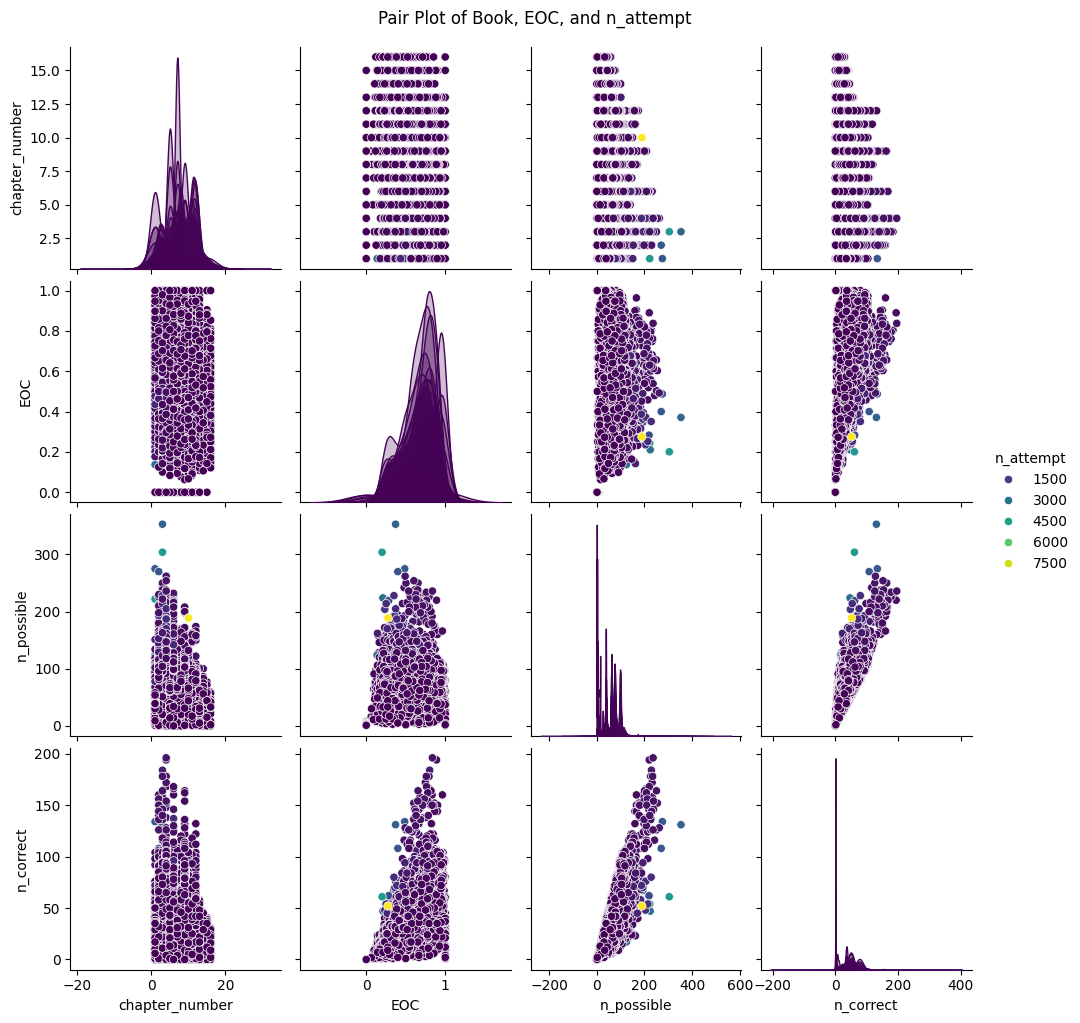

In [ ]:
import pandas as pd
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('checkpoints_eoc.csv')

# Create a pair plot
sns.pairplot(df, hue='n_attempt', palette='viridis')
plt.suptitle('Pair Plot of Book, EOC, and n_attempt', y=1.02)
plt.show()


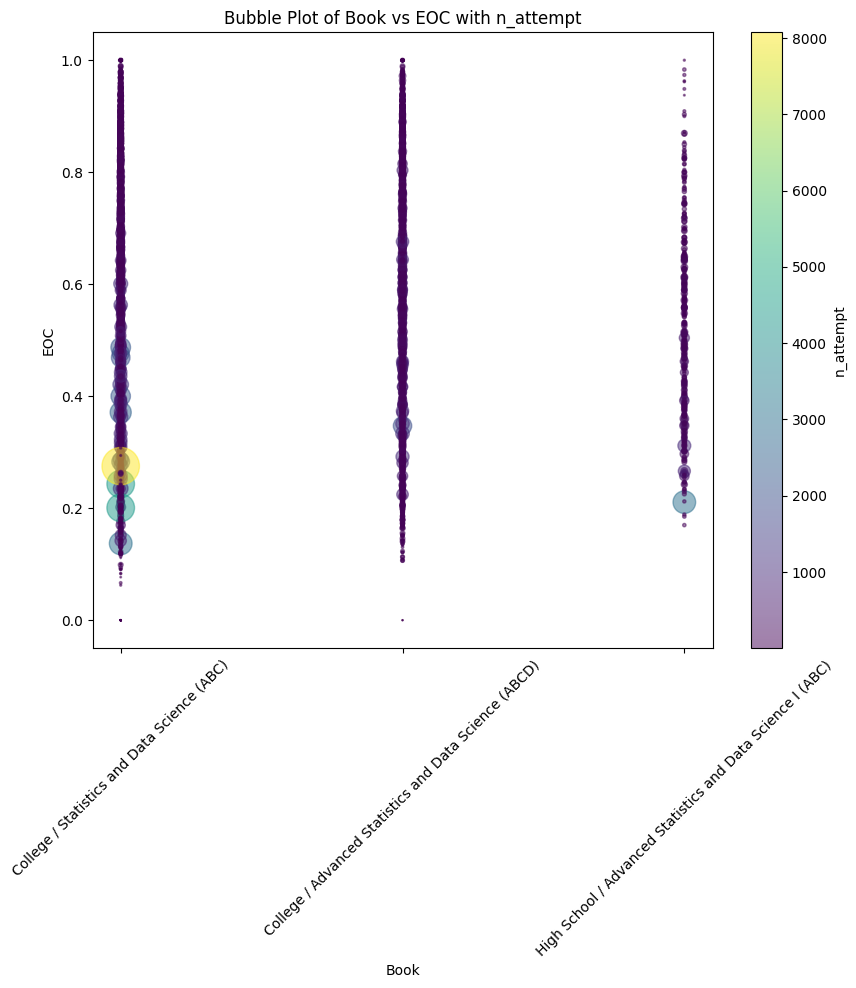

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('checkpoints_eoc.csv')

# Create the bubble plot
plt.figure(figsize=(10, 8))
bubble = plt.scatter(df['book'], df['EOC'], s=df['n_attempt']*0.09, c=df['n_attempt'], cmap='viridis', alpha=0.5)
plt.colorbar(bubble, label='n_attempt')
plt.title('Bubble Plot of Book vs EOC with n_attempt')
plt.xlabel('Book')
plt.ylabel('EOC')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

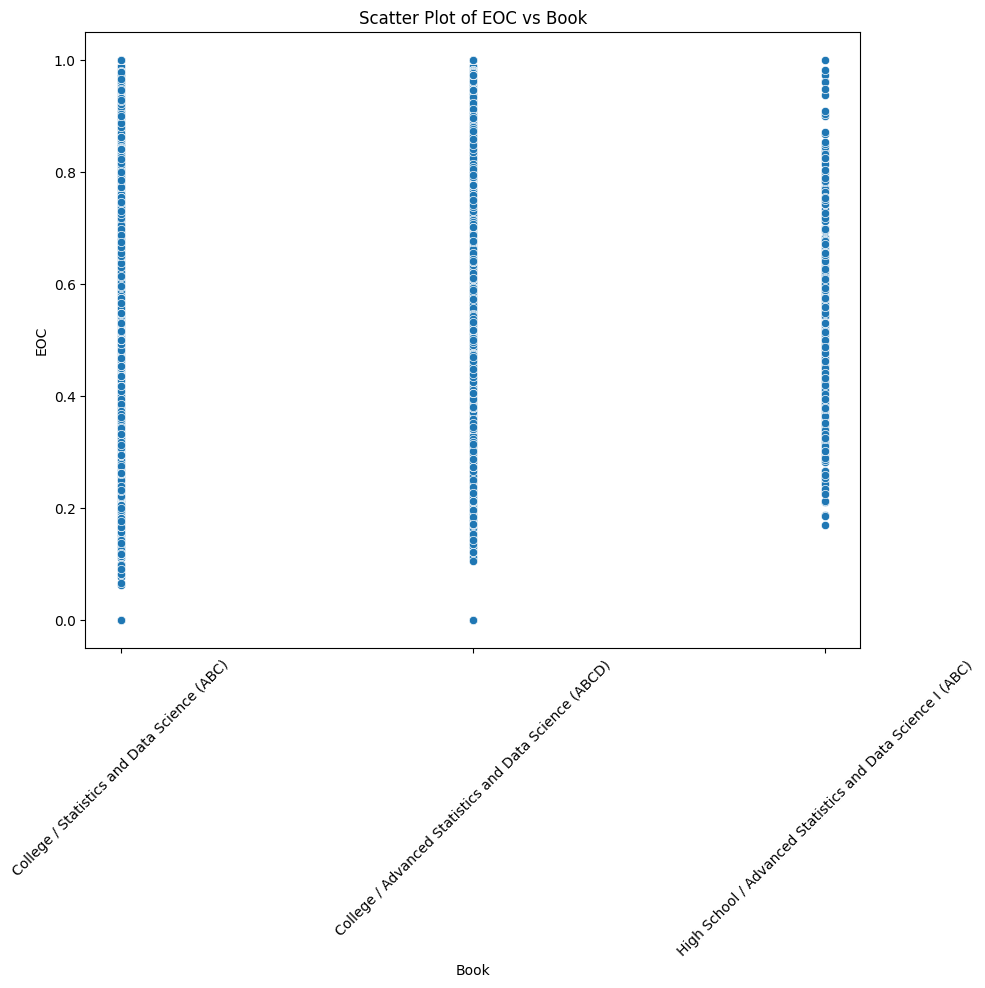

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('checkpoints_eoc.csv')

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='book', y='EOC')
plt.title('Scatter Plot of EOC vs Book')
plt.xlabel('Book')
plt.ylabel('EOC')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

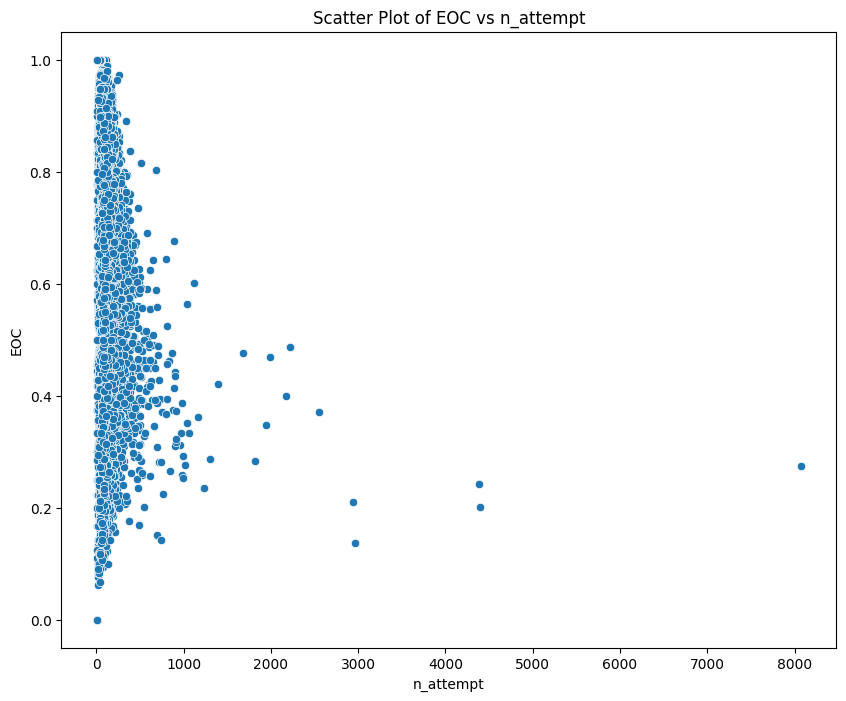

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('checkpoints_eoc.csv')

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='n_attempt', y='EOC')
plt.title('Scatter Plot of EOC vs n_attempt')
plt.xlabel('n_attempt')
plt.ylabel('EOC')
plt.show()


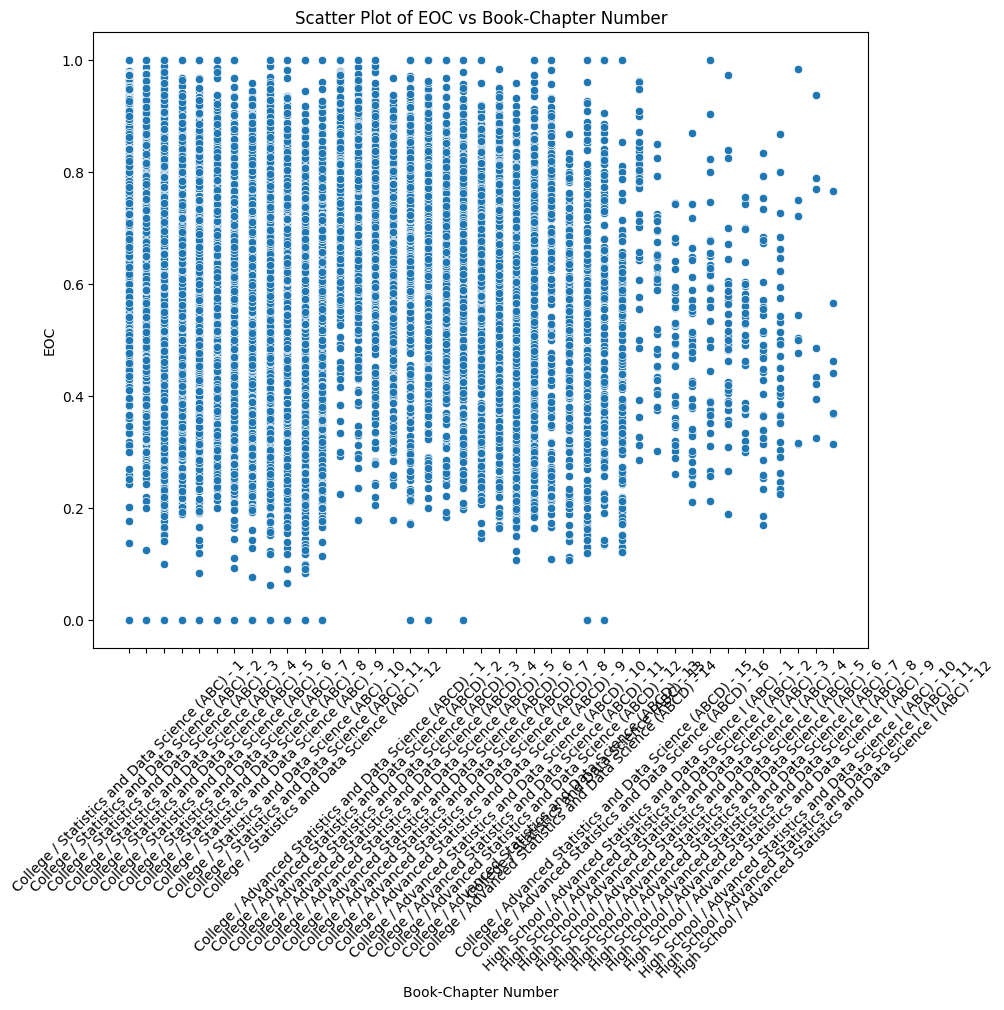

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('checkpoints_eoc.csv')

# Merge "chapter_number" and "book" columns into a new column "book_chapter_number"
df['book_chapter_number'] = df['book'] + ' - ' + df['chapter_number'].astype(str)

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='book_chapter_number', y='EOC')
plt.title('Scatter Plot of EOC vs Book-Chapter Number')
plt.xlabel('Book-Chapter Number')
plt.ylabel('EOC')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


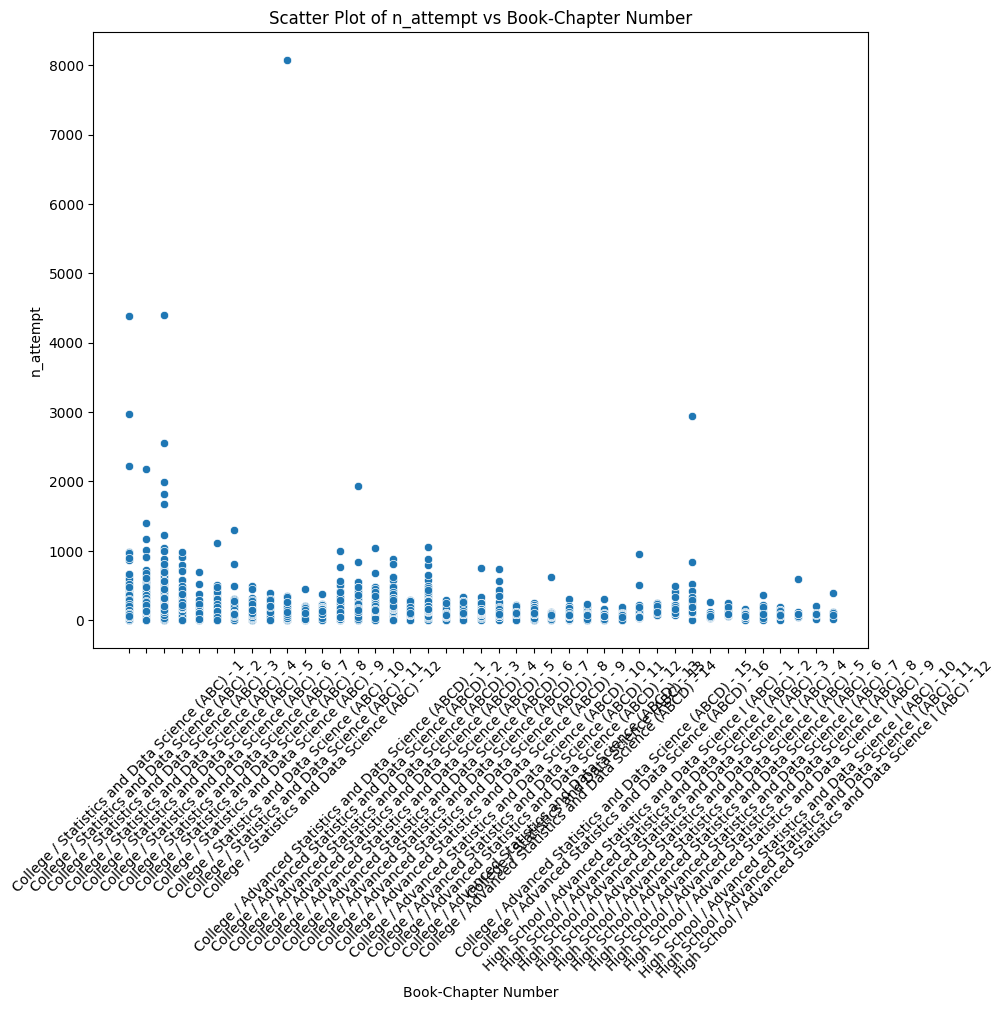

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('checkpoints_eoc.csv')

# Merge "chapter_number" and "book" columns into a new column "book_chapter_number"
df['book_chapter_number'] = df['book'] + ' - ' + df['chapter_number'].astype(str)

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='book_chapter_number', y='n_attempt')
plt.title('Scatter Plot of n_attempt vs Book-Chapter Number')
plt.xlabel('Book-Chapter Number')
plt.ylabel('n_attempt')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV files into DataFrames
df_eoc = pd.read_csv('checkpoints_eoc.csv')
df_pulse = pd.read_csv('checkpoints_pulse.csv')

# Merge the datasets based on the book name
merged_df = pd.merge(df_eoc, df_pulse, on='book', how='inner')

# Create the scatter plot to compare "Book-Chapter Number" and "book_release"
plt.figure(figsize=(10, 8))
sns.scatterplot(data=merged_df, x='Book-Chapter Number', y='book_release')
plt.title('Comparison of Book-Chapter Number and book_release')
plt.xlabel('Book-Chapter Number')
plt.ylabel('book_release')
plt.show()


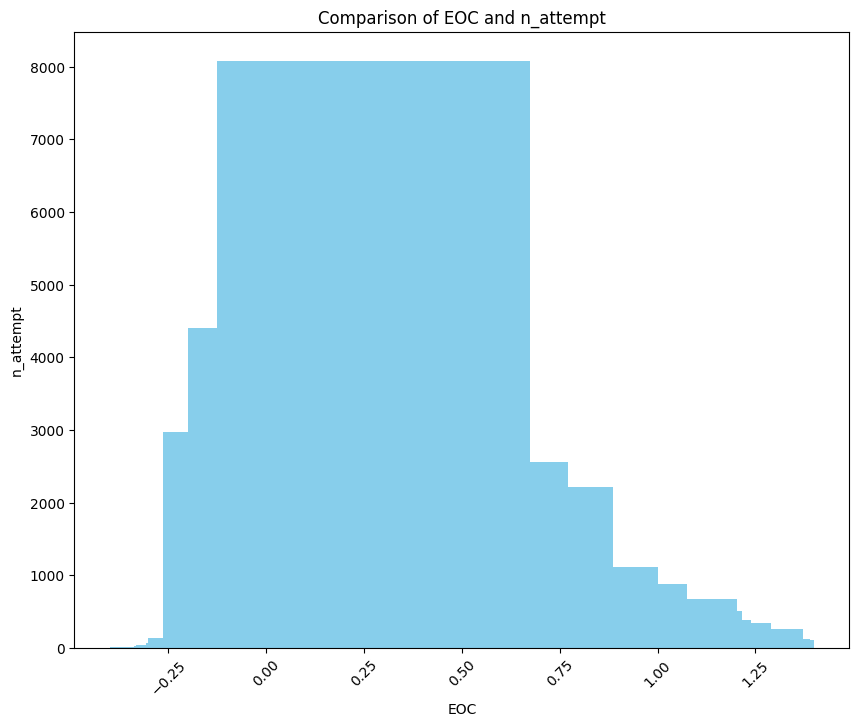

In [ ]:
import matplotlib.pyplot as plt

# Assuming df contains the DataFrame with appropriate data
plt.figure(figsize=(10, 8))
plt.bar(df['EOC'], df['n_attempt'], color='skyblue')
plt.title('Comparison of EOC and n_attempt')
plt.xlabel('EOC')
plt.ylabel('n_attempt')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


<ipython-input-8-80d113fab291>:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


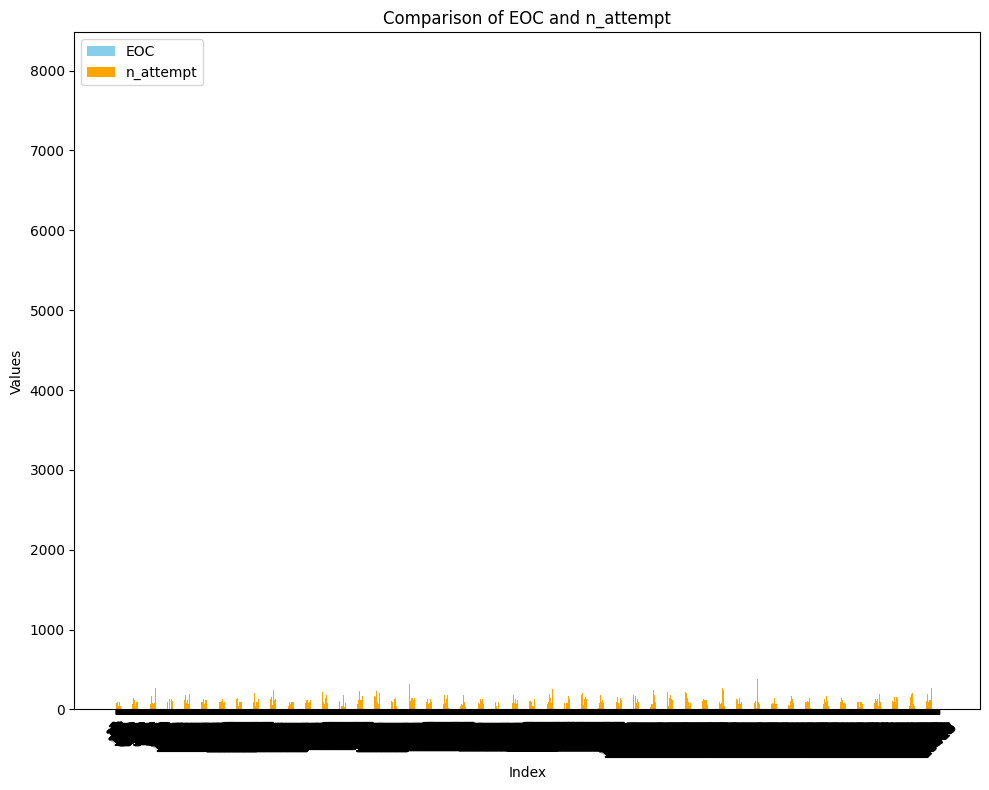

In [ ]:
import numpy as np

# Assuming df contains the DataFrame with appropriate data
plt.figure(figsize=(10, 8))

# Define the width of the bars
bar_width = 0.35

# Define the x-axis positions for the bars
x = np.arange(len(df['EOC']))

# Plot the bars for EOC
plt.bar(x - bar_width/2, df['EOC'], width=bar_width, color='skyblue', label='EOC')

# Plot the bars for n_attempt with a gap
plt.bar(x + bar_width/2, df['n_attempt'], width=bar_width, color='orange', label='n_attempt')

plt.title('Comparison of EOC and n_attempt')
plt.xlabel('Index')
plt.ylabel('Values')
plt.xticks(x, df.index, rotation=45)  # Set the x-axis labels to be the index of the DataFrame
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-9-8b23f1a37c28>:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


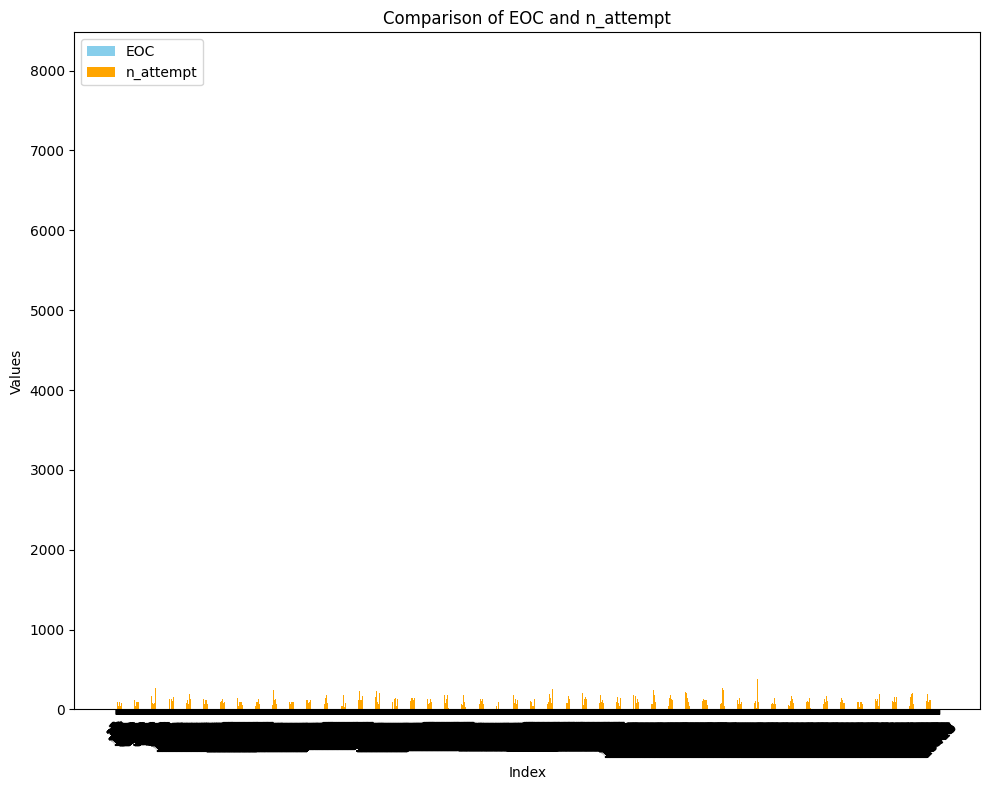

In [ ]:
import numpy as np

# Assuming df contains the DataFrame with appropriate data
plt.figure(figsize=(10, 8))

# Define the width of the bars
bar_width = 0.3

# Define the x-axis positions for the bars
x = np.arange(len(df['EOC']))

# Plot the bars for EOC
plt.bar(x - bar_width/2, df['EOC'], width=bar_width, color='skyblue', label='EOC')

# Plot the bars for n_attempt with a small gap
plt.bar(x + bar_width/2, df['n_attempt'], width=bar_width, color='orange', label='n_attempt')

plt.title('Comparison of EOC and n_attempt')
plt.xlabel('Index')
plt.ylabel('Values')
plt.xticks(x, df.index, rotation=45)  # Set the x-axis labels to be the index of the DataFrame
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-10-db8f2a4a4deb>:25: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


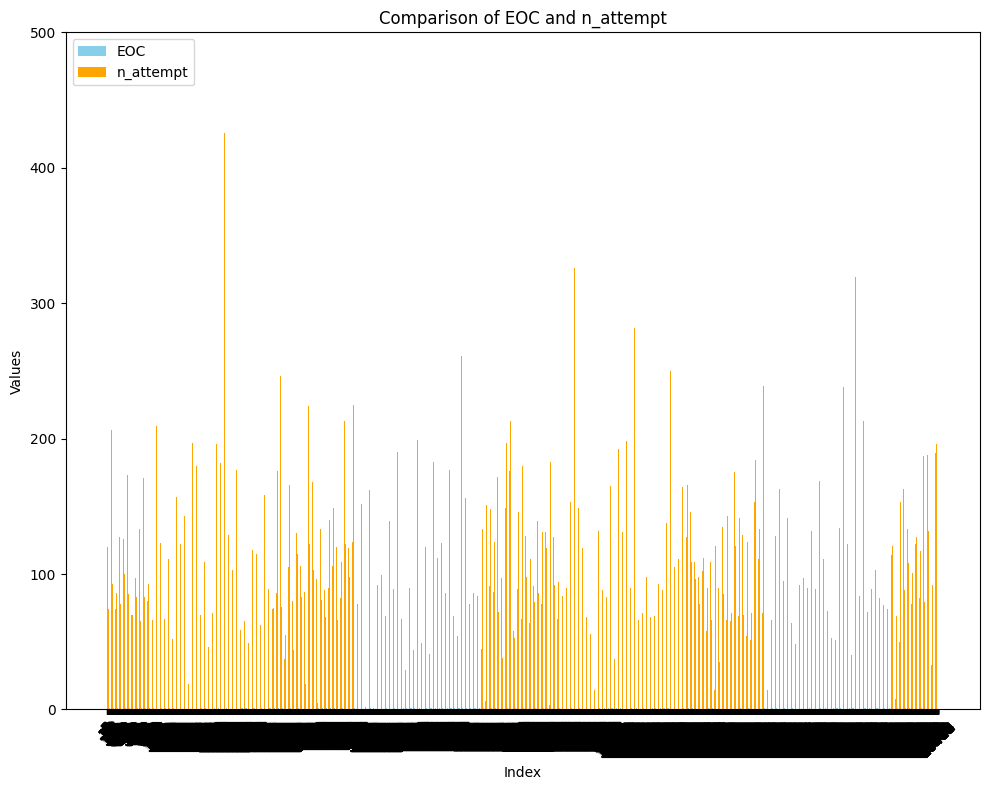

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('checkpoints_eoc.csv')

# Define a dictionary to map book names to abbreviations
book_mapping = {
    'College / Statistics and Data Science (ABC)': 'ABC_CL',
    'College / Advanced Statistics and Data Science (ABCD)': 'ABCD_CL',
    'High School / Advanced Statistics and Data Science I (ABC)': 'ABC_HSL'
}

# Merge "chapter_number" and "book" columns into a new column "book_chapter_number" with updated book names
df['book_chapter_number'] = df['book'].replace(book_mapping) + ' - ' + df['chapter_number'].astype(str)

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='book_chapter_number', y='EOC')
plt.title('Scatter Plot of EOC vs Book-Chapter Number')
plt.xlabel('Book-Chapter Number')
plt.ylabel('EOC')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'checkpoints_eoc.csv'

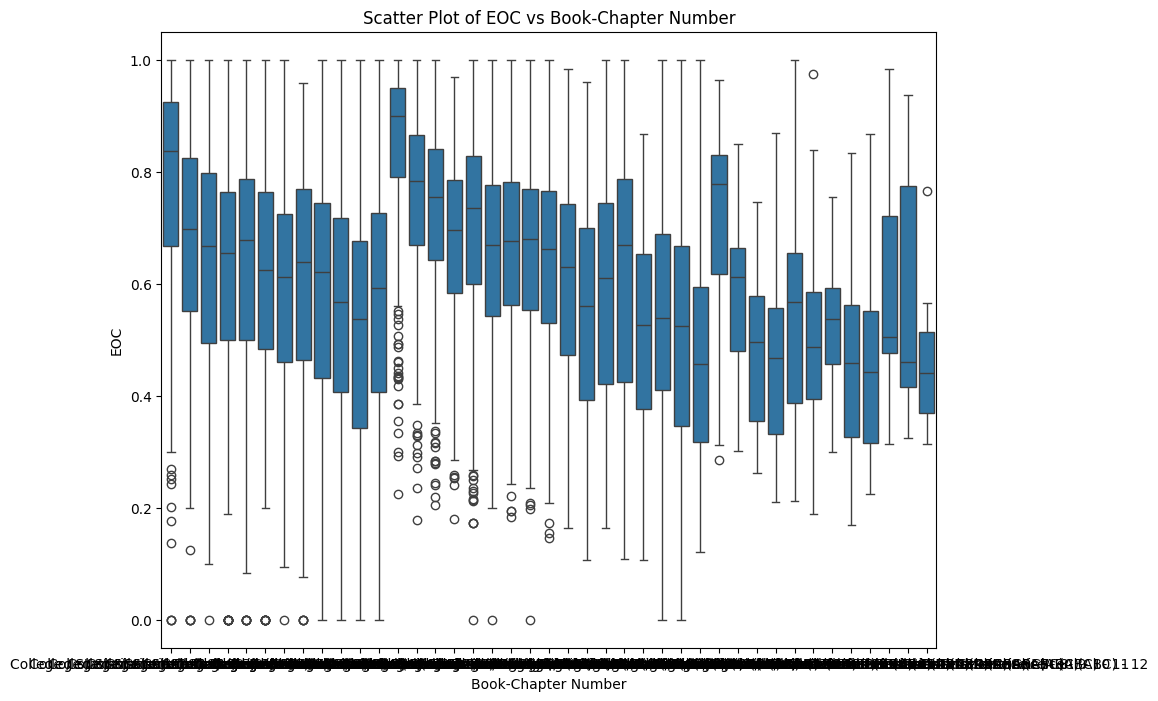

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('checkpoints_eoc.csv')

# Merge "chapter_number" and "book" columns into a new column "book_chapter_number"
df['book_chapter_number'] = df['book'] + ' - ' + df['chapter_number'].astype(str)

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='book_chapter_number', y='EOC')
plt.title('Scatter Plot of EOC vs Book-Chapter Number')
plt.xlabel('Book-Chapter Number')
plt.ylabel('EOC')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.show()
